#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [90]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [91]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Basic Date Exploration

In [109]:
# display the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# display data types of each column
print("\nData types of each column:", df.dtypes)

# check for missing values
print("\nMissing values in each column:", df.isnull().sum())

Number of rows: 148650
Number of columns: 13

Data types of each column: Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column: Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148650
Agency                   0
Status              148650
dtype: int64


# Data Cleaning

In [93]:
# filling the missing data with the mean.. as -in the end of the day- they are some means
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)

# dropping missing data of the additional pay.. as there is not a must that everbody takes an add pay..
df.dropna(subset=['OtherPay'], inplace=True)

# getting the abs of the Salary as it has some negative values..
df['TotalPay'] = df['TotalPay'].abs()

# Descriptive Statistics

In [94]:
#basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of Salary:", std_dev_salary)

Mean Salary: 74770.34221755803
Median Salary: 71427.23999999999
Mode Salary: 0.0
Minimum Salary: 0.0
Maximum Salary: 567595.43
Salary Range: 567595.43
Standard Deviation of Salary: 50516.18369896993


# Basic Data Visualization

In [95]:
#find rows containing the word 'fire'
mask = df['JobTitle'].str.contains('fire', case=False)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'FIRE Dep'

In [96]:
#find rows containing the words
mask = df['JobTitle'].str.contains('police|sheriff', case=False)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'POLICE Dep'

In [97]:
# Find rows containing the words
mask = df['JobTitle'].str.contains('med|nur|doc|dentist|health|patient', case=False, regex=True)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'Medical Dep'


In [98]:
# Find rows containing the words 'doctor' or 'dentist'
mask = df['JobTitle'].str.contains('law', case=False, regex=True)

# Replace them with 'Medicine Dep'
df.loc[mask, 'JobTitle'] = 'LAW Dep'


In [99]:
# Find rows containing the words 'doctor' or 'dentist'
mask = df['JobTitle'].str.contains('acc', case=False, regex=True)

# Replace them with 'Medicine Dep'
df.loc[mask, 'JobTitle'] = 'ACCOUNTANT Dep'


In [100]:
# Find rows containing the words
mask = df['JobTitle'].str.contains('vet|animal', case=False, regex=True)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'VET Dep'

In [101]:
# Find rows containing the words
mask = df['JobTitle'].str.contains('eng|arc', case=False, regex=True)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'Engineer Dep'

In [102]:
# Find rows containing the words
mask = df['JobTitle'].str.contains('public service|svc', case=False, regex=True)

# Replace them with one index
df.loc[mask, 'JobTitle'] = 'Public Svc Dep'

In [103]:
df['JobTitle'] = df['JobTitle'].str.lower()  

In [104]:
df.to_csv('new.csv', index=False)

 PieChart

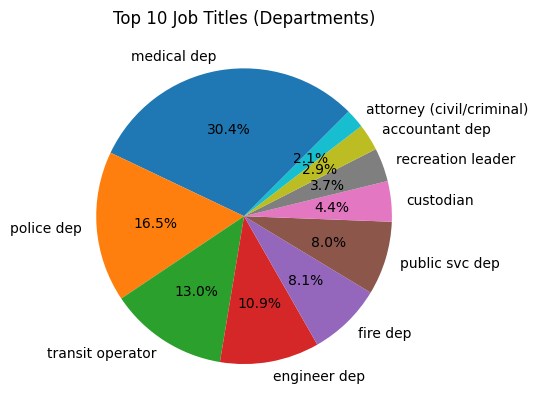

In [105]:
#the pie chart for of employees in each departments
department_counts = df['JobTitle'].value_counts().head(10)
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Top 10 Job Titles (Departments)')
plt.show()

Histogram

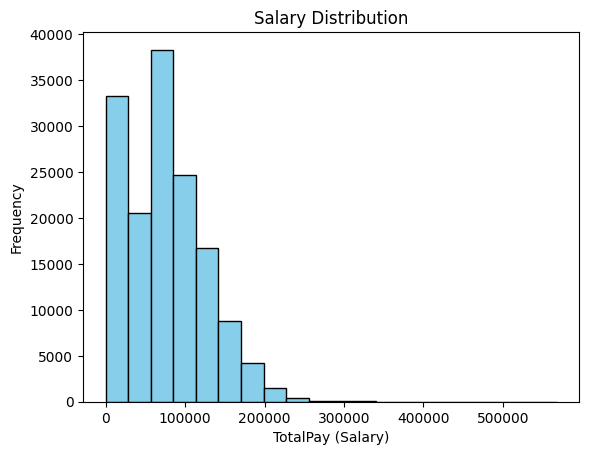

In [106]:
import matplotlib.pyplot as plt

#histogram for the distribution of salaries
plt.hist(df['TotalPay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('TotalPay (Salary)')
plt.ylabel('Frequency')
plt.show()


# Grouping by year

Average Salary by Year: Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75471.869344
Name: TotalPay, dtype: float64


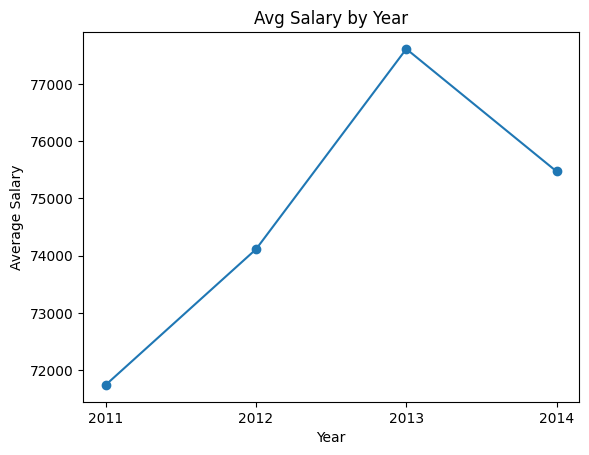

In [107]:
grouped_data = df.groupby('Year')['TotalPay'].mean()
print("Average Salary by Year:",grouped_data )
grouped_data.plot(kind='line', marker='o', title='Avg Salary by Year')
plt.xticks(grouped_data.index)
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()

# Simple Correlation Analysis

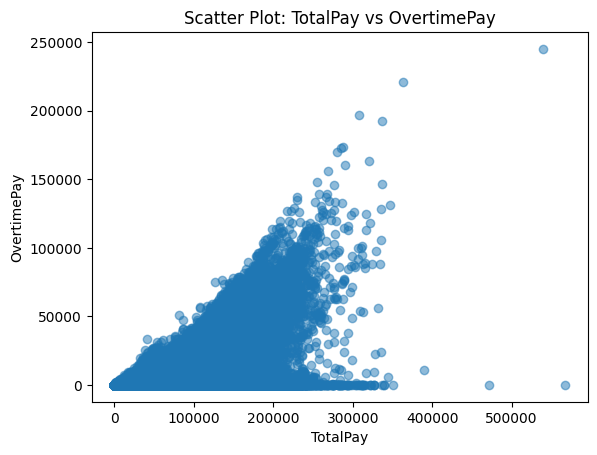

Correlation between TotalPay and OvertimePay: 50.49 %


In [108]:
correlation = df['TotalPay'].corr(df['OvertimePay'])

# Plot a scatter plot to visualize the relationship
plt.scatter(df['TotalPay'], df['OvertimePay'], alpha=0.5)
plt.title('Scatter Plot: TotalPay vs OvertimePay')
plt.xlabel('TotalPay')
plt.ylabel('OvertimePay')
plt.show()

print("Correlation between TotalPay and OvertimePay:", round(correlation*100,2),'%')


# Good Luck!

# Summary
-  The data needed to be cleaned and corrected as it has some missing data and other negative (only positve values)[Salary].

-  Most of the employees in San Francisco either take 25K or 100K.. and the rest take the rest.

-  An NLP model is a must to categorize the job titles, as manually is a real challenging work.

-  2013 was the peak of funding salaries in the market, as after that year, the avg salary took its way again down.. some poitcal and economical context would be useful.

-  There is an indoubtable correlation between TotalPay and OvertimePay, so we can say that employees who work more overtime tend to have higher total pay than their fellas.